In [5]:
# %% Generate a plane mesh
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from pxr import Kind, Usd, UsdGeom 


In [6]:
if os.path.exists("plane.usd"):
    stage = Usd.Stage.Open("plane.usd")
else:
    stage = Usd.Stage.CreateNew("plane.usd")
UsdGeom.SetStageUpAxis(stage, UsdGeom.Tokens.y)
UsdGeom.SetStageMetersPerUnit(stage, UsdGeom.LinearUnits.meters)

modelRoot = UsdGeom.Xform.Define(stage, "/TexModel")
Usd.ModelAPI(modelRoot).SetKind(Kind.Tokens.component)

scale = 0.1
length = 100
width = 100

vertices = []
indices = []

for z in range(length + 1):
    for x in range(width):
        vertices.append((x * scale, 0, z * scale))

for i in range(width * length):
    if i % width == width - 1: continue
    indices.append(i)
    indices.append(i + 1)
    indices.append(i + width)
    indices.append(i + width)
    indices.append(i + 1)
    indices.append(i + width + 1)

billboard = UsdGeom.Mesh.Define(stage, "/TexModel/card")
billboard.CreateOrientationAttr(UsdGeom.Tokens.leftHanded)
billboard.CreatePointsAttr(vertices)
billboard.CreateFaceVertexCountsAttr([3 for i in range(math.floor(len(indices) / 3))])
billboard.CreateFaceVertexIndicesAttr(indices)
billboard.CreateExtentAttr([(0, -1, 0), (width, 1, length)])

stage.Save()

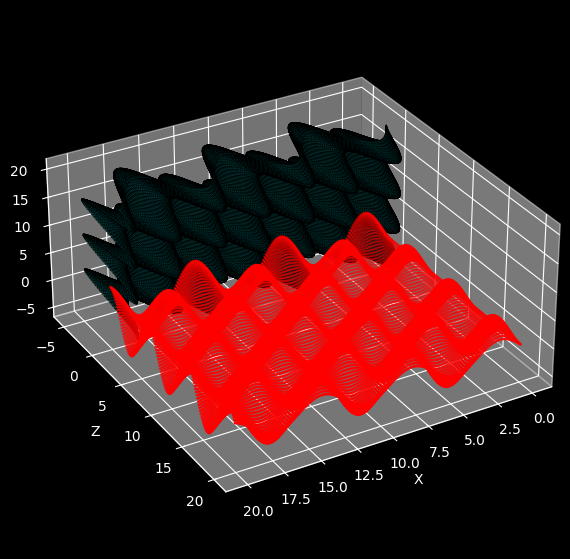

In [2]:

# %% Wavey model

# Parameters
scale = 0.1
length = 200  # Increase the size of the grid
width = 200
wave_amplitude = 5  # Amplitude of the wave
wave_frequency = 0.1  # Frequency of the wave

# Generate vertices with a wavy pattern
vertices = []
indices = []

for z in range(length + 1):
    for x in range(width + 1):
        y = wave_amplitude * math.sin(wave_frequency * x) * math.cos(wave_frequency * z)
        vertices.append((x * scale, y, z * scale))

# Generate indices for the triangles
for z in range(length):
    for x in range(width):
        i = z * (width + 1) + x
        indices.append([i, i + 1, i + width + 1])
        indices.append([i + width + 1, i + 1, i + width + 2])

# Convert vertices and indices into numpy arrays
vertices = np.array(vertices)
faces = np.array(indices)

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the vertices as points
ax.scatter(vertices[:, 0], vertices[:, 2], vertices[:, 1], color='r', s=1)

# Plot the mesh
mesh = Poly3DCollection(vertices[faces], alpha=.6, facecolor='cyan', edgecolor='k')
ax.add_collection3d(mesh)

# Set plot parameters
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')

# Equal scaling for all axes
ax.set_box_aspect([1, 1, 0.5])  # Aspect ratio (x:y:z)

# Set the viewing angle for better perspective
ax.view_init(elev=30, azim=60)

stage.Save()

# Display the plot
# plt.show()